<a href="https://colab.research.google.com/github/mhalmenschlager/notebooks/blob/main/Analisando_os_dados_do_Airbnb_T%C3%B3quio_(Jap%C3%A3o).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

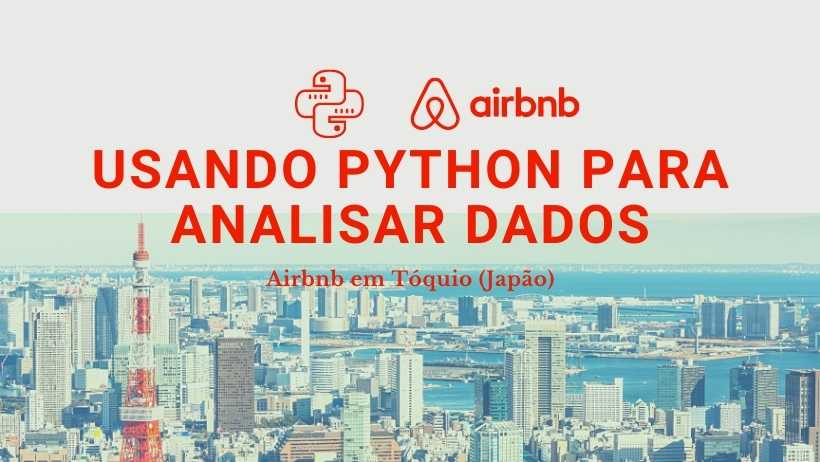

*Por Matheus Yuri Halmenschlager. Este* notebook *possui inspiração na primeira atividade prática do curso online Data Science na Prática, do [Sigmoidal, com o professor Carlos Melo](https://sigmoidal.ai/).*


## Apresentação
O Japão é um lugar que hoje habita a imaginação de muitas pessoas. Desde os prédios com arquitetura moderna, chegando às habitações tradicionais com finas paredes e portas de correr, as paisagens japonesas são retratadas das mais variadas formas, de filmes a histórias em quadrinhos, que nos chegam hoje graças à globalização. Além disso, os avanços tecnológicos que surgem da indústria nipônica colocam o país em destaque no mapa mundial de competidores nessa área. Por essas e outras razões o Japão atrai curiosidade dos mais variados cantos do mundo, se colocando como um frequente e excelente destino para viajar.

Uma vez que as fronteiras hoje são meras linhas imaginárias (isso antes e, esperamos, depois da pandemia em curso), está cada vez mais fácil das pessoas se deslocarem e, sobretudo, encontrarem um bom lugar para ficar. Uma das plataformas mais conhecidas para encontrar hospedagem em variados locais é o [Airbnb](https://www.airbnb.com.br/), que já é considerado como sendo a **maior empresa hoteleira da atualidade**. O detalhe mais interessante disso é que a empresa **não possui nenhum hotel**.

Ao conectar pessoas que querem viajar (e se hospedar) com anfitriões que querem alugar seus imóveis de maneira prática e econômica, o Airbnb fornece uma plataforma inovadora para tornar essa hospedagem alternativa.

No final de 2018, a Startup fundada 10 anos atrás, já havia **hospedado mais de 300 milhões** de pessoas ao redor de todo o mundo, em uma plataforma que hoje pode ser encontrada em mais de 60 línguas e nos cinco continentes, desafiando as redes hoteleiras tradicionais.

Uma das iniciativas do Airbnb é manter seus dados abertos. A platforma já vem disponibilizando dados do seu site, para algumas das principais cidades do mundo. Por meio do portal [Inside Airbnb](http://insideairbnb.com/get-the-data.html), é possível baixar uma grande quantidade de dados para desenvolver projetos e soluções de *Data Science*.

**Tendo isso em conta, neste *notebook* iremos analisar os dados referentes à cidade de Tóquio, no Japão, e ver que *insights* podemos extrair a partir dos dados brutos disponibilizados pelo Airbnb.**

## Obtenção dos Dados

Os dados que serão utilizados no Notebook serão extraídos do site [Inside Airbnb](htts://insideairbnb.com/get-the-data.html); utilizaremos o *dataset* com data de compilação em 25-02-2021.

Para a análise exploratória, usaremos apenas um arquivo de todos listados no site:
* `listings.csv` - *Summary information and metrics for listings in Tokyo (good for visualisations)*.

Além disso, será necessário a instalação de alguns pacotes, como o **Pandas**, o **matplotlib**, o **Seaborn**, e o **Folium**.


In [ ]:
# Importando os pacotes necessários para a análise
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import folium

 
%matplotlib inline

In [ ]:
# Importando o arquivo listings.csv para um DataFrame
df = pd.read_csv("http://data.insideairbnb.com/japan/kant%C5%8D/tokyo/2021-02-25/visualisations/listings.csv")

Importados pacotes e o arquivo .csv que será utilizado, podemos fazer as primeiras análises.

## Análise dos Dados

Estas primeiras análises serão feitas para poder dar ao leitor um entendimento de como os dados estão estruturados no *dataset* adquirido.

**Dicionário das variáveis**

Já importado o arquivo `.csv`, podemos listar as variáveis que serão encontradas e utilizadas nas análises:

* `id` - Número de ID gerado para identificar o imóvel;
* `name` - Nome da propriedade conforme anunciada no Airbnb;
* `host_id` - ID do proprietário (anfitrião) da propriedade;
* `host_name` - Nome do anfitrião;
* `neighbourhood_group` - Não há valores válidos aqui;
* `neighbourhood` - Nome do bairro;
* `latitude` - Coordenada da latitude da propriedade;
* `longitude` - Coordenada da longitude da propriedade;
* `room_type` - O tipo de quarto que é oferecido;
* `price` - O preço de aluguel do imóvel;
* `minimum_nights` - Quantidade mínima de noites para reservar;
* `number_of_reviews` - Quantidade de reviews totais que a propriedade possui;
* `last_review` - Data do último review;
* `reviews_per_month` - Quantidade de reviews por mês;
* `calculated_host_listings_count` - Quantidade de imóveis do mesmo anfitrião;
* `availability_365` - Em um ano (365 dias), número de dias de disponibilidade do imóvel.

Antes de iniciar qualquer análise, vamos verificar a cara do nosso *dataset*, analisando as 5 primeiras entradas.

In [ ]:
# mostrar as 5 primeiras entradas
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,197677,Oshiage Holiday Apartment,964081,Yoshimi & Marek,NaN,Sumida Ku,35.71721,139.82596,Entire home/apt,11000,3,165,2020-03-04,1.44,1,328
1,776070,Kero-kero house room 1,801494,Kei,NaN,Kita Ku,35.73844,139.76917,Private room,7428,3,228,2020-01-18,2.27,1,146
2,899003,"Classy room @Shinjuku, Takadanoba",4799233,Yu,NaN,Shinjuku Ku,35.70865,139.69681,Entire home/apt,5200,30,93,2019-11-25,0.95,2,0
3,1016831,WOMAN ONLY LICENSED ! Cosy & Cat behnd Shibuya,5596383,Wakana,NaN,Setagaya Ku,35.65833,139.67153,Private room,11000,1,211,2020-03-16,2.19,1,139
4,1033276,private room @Senju area,5686404,Yukiko,NaN,Adachi Ku,35.74253,139.79730,Private room,30000,1,72,2018-06-17,0.76,2,271


Já é possível ver algumas informações interessantes que serão utilizadas mais pra frente. Podemos inclusive ver algumas informações em separado; vejamos quais são os bairros de Tóquio estão representadas nesse *dataset*, utilizando a variável `neighbourhood`.

In [ ]:
# Mostrar os bairros de Tóquio representados
df['neighbourhood'].unique()

array(['Sumida Ku', 'Kita Ku', 'Shinjuku Ku', 'Setagaya Ku', 'Adachi Ku',
       'Shibuya Ku', 'Katsushika Ku', 'Meguro Ku', 'Toshima Ku',
       'Koto Ku', 'Shinagawa Ku', 'Minato Ku', 'Suginami Ku',
       'Akishima Shi', 'Bunkyo Ku', 'Taito Ku', 'Itabashi Ku',
       'Arakawa Ku', 'Machida Shi', 'Higashimurayama Shi', 'Chuo Ku',
       'Nerima Ku', 'Kokubunji Shi', 'Hino Shi', 'Mitaka Shi',
       'Nakano Ku', 'Hachioji Shi', 'Edogawa Ku', 'Musashino Shi',
       'Koganei Shi', 'Ota Ku', 'Akiruno Shi', 'Chiyoda Ku',
       'Kodaira Shi', 'Fuchu Shi', 'Fussa Shi', 'Tama Shi', 'Komae Shi',
       'Chofu Shi', 'Nishitokyo Shi', 'Hinohara Mura', 'Ome Shi',
       'Kunitachi Shi', 'Okutama Machi', 'Hamura Shi', 'Tachikawa Shi',
       'Musashimurayama Shi', 'Inagi Shi'], dtype=object)

## Perguntas
### **Q1. Quantos atributos (variáveis) e quantas entradas o nosso conjunto de dados possui? Quais os tipos das variáveis?**

Vamos prosseguir e identificar a quantidade de entradas que nosso conjunto de dados possui e ver os tipos de cada coluna.

Este *dataset* que baixamos é a versão "resumida" do Airbnb, onde já é possível analisar os dados da forma como está nesse notebook. Na mesma página que baixamos o arquivo `listings.csv`. Há uma versão mais completa, a `listings.csv.gz`.

In [ ]:
# identificar o volume de dados do DataFrame (quantas entradas e variáveis há)
print("Entradas:\t {}".format(df.shape[0]))
print("Variáveis:\t {}\n".format(df.shape[1]))

# verificar as 5 primeiras entradas do dataset
display(df.dtypes)

Entradas:	 11308
Variáveis:	 16



id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group               float64
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
dtype: object

### **Q2. Qual a porcentagem de valores ausentes no *dataset*?**

A qualidade de um *dataset* está diretamente relacionada à representatividade de suas amostras; um dos aspectos que envolvem isso é a quantidade de dados considerados nulos em cada variável. É essencial entender logo no início se a presença desses valores nulos, comparados ao total de entradas, são significativos.

Sobre esse *dataset* em específico:
* É possível ver que a coluna `neighbourhood_group` possui 100% dos seus valores faltantes. 
* As variáveis `reviews_per_month` e `last_review` possuem valores nulos em 19% das linhas.
* A variável `host_name` têm aproximadamente 0,1% dos valores nulos.

In [ ]:
# ordenar em ordem decrescente as variáveis por seus valores ausentes (isnull)
(df.isnull().sum() / df.shape[0]).sort_values(ascending=False)

neighbourhood_group               1.000000
reviews_per_month                 0.186328
last_review                       0.186328
host_name                         0.001592
availability_365                  0.000000
calculated_host_listings_count    0.000000
number_of_reviews                 0.000000
minimum_nights                    0.000000
price                             0.000000
room_type                         0.000000
longitude                         0.000000
latitude                          0.000000
neighbourhood                     0.000000
host_id                           0.000000
name                              0.000000
id                                0.000000
dtype: float64

### **Q3. Qual o tipo de distribuição das variáveis?** 
Para analisar a distribuição das variáveis, é possível plotar histogramas. Esse recurso gráfico permite analisar e ordenar as frequências de cada variável. Os histogramas são um bom recurso para verificar visualmente aspectos como a normalidade dos dados.

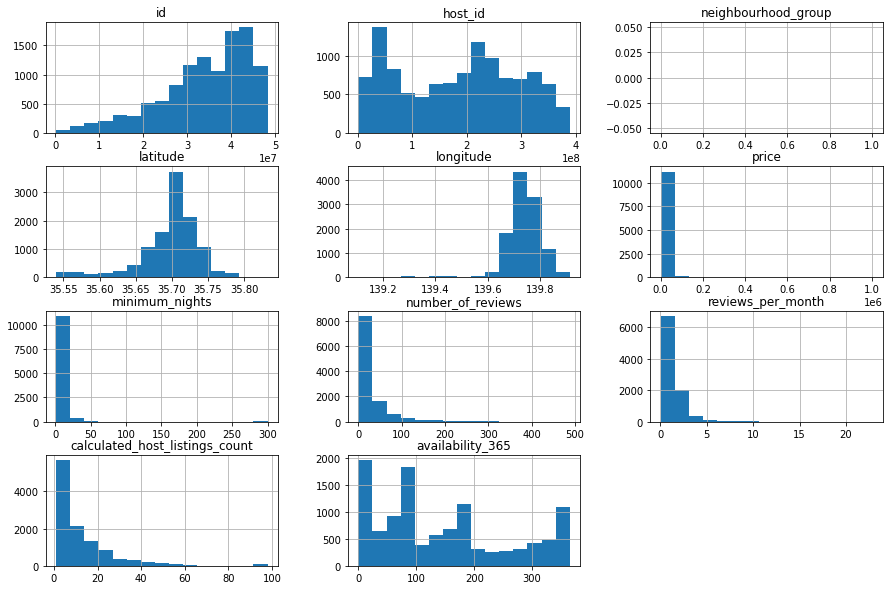

In [ ]:
# plotar o histograma das variáveis numéricas
df.hist(bins=15, figsize=(15,10));


### **Q4. Há *outliers* presentes?**

Pela distribuição do histograma, é possível verificar indícios da presença de *outliers*. Olhe por exemplo as variáveis `price`, `minimum_nights` e `calculated_host_listings_count`.

Analisando visualmente, percebemos que os valores não seguem uma distribuição, havendo uma distorção na representação gráfica, levemente perceptível. Para confirmar, há duas maneiras rápidas que auxiliam a detecção de *outliers*. São elas:

* Resumo estatístico por meio do método `describe()`
* Plotar `boxplots` para a variável.

In [ ]:
# ver o resumo estatístico das variáveis numéricas
df[['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month',
    'calculated_host_listings_count', 'availability_365']].describe()

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,11308.000000,11308.000000,11308.000000,9201.000000,11308.000000,11308.000000
mean,12087.621330,3.683764,26.297489,1.174213,12.509904,144.371418
std,34894.056148,17.711242,41.276481,1.126682,14.518241,115.652836
min,0.000000,1.000000,0.000000,0.020000,1.000000,0.000000
25%,4000.000000,1.000000,1.000000,0.400000,3.000000,56.000000
50%,6714.000000,1.000000,10.000000,0.940000,7.000000,117.000000
75%,12000.000000,2.000000,34.000000,1.610000,16.000000,220.000000
max,1000000.000000,300.000000,488.000000,22.800000,98.000000,365.000000


Olhando o resumo estatístico acima, podemos confirmar algumas hipóteses como:

* A variável `price` possui 75% do valor abaixo de 12000, porém seu valor máximo é 1000000.
* A quantidade mínima de noites (`minimum_nights`) é de 2 em 75% dos casos, sendo que o valor máximo é 300.

Uma outra medida de variância que pode auxiliar na busca por *outliers* é a de **desvio-padrão**. Ao compararmos com a média (expressa por `mean`) das variáveis que foram citadas, percebemos que essa medida de variância (expressa por `std`) é muito maior do que o valor considerado como a média; isso significa que a variância dessas variáveis é alta.

#### Boxplot para minimum_nights

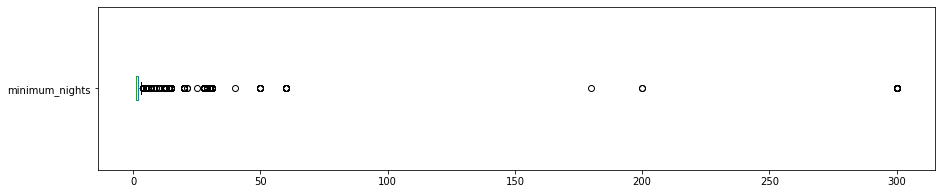

minimum_nights: valores acima de 30:
62 entradas
0.5483%


In [ ]:
# minimum_nights
df.minimum_nights.plot(kind='box', vert=False, figsize=(15, 3))
plt.show()

# ver quantidade de valores acima de 30 dias para minimum_nights
print("minimum_nights: valores acima de 30:")
print("{} entradas".format(len(df[df.minimum_nights > 30])))
print("{:.4f}%".format((len(df[df.minimum_nights > 30]) / df.shape[0])*100))

### Boxplot para price

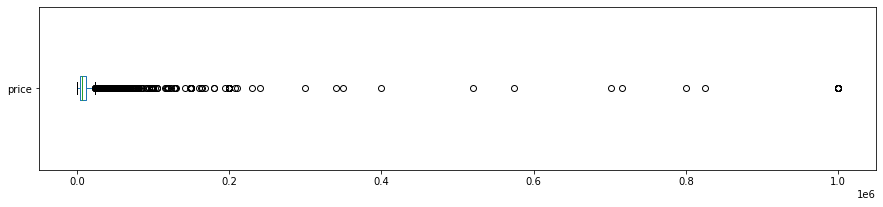


price: valores acima de 12000
2760 entradas
24.4075%


In [ ]:
# price
df.price.plot(kind='box', vert=False, figsize=(15, 3),)
plt.show()

# ver quantidade de valores acima de 12000 para price
print("\nprice: valores acima de 12000")
print("{} entradas".format(len(df[df.price > 12000])))
print("{:.4f}%".format((len(df[df.price > 12000]) / df.shape[0])*100))

# df.price.plot(kind='box', vert=False, xlim=(0,1300), figsize=(15,3));

#### Histogramas após limpeza de dados

Já que identificamos *outliers* nas variáveis `price` e `minimum_nights`, vamos agora fazer uma limpeza no *dataframe* e plotar novamente o histograma, estabelecendo o limite de 12000 para a variável `price` e 30 para a variável `minimum_nights`.


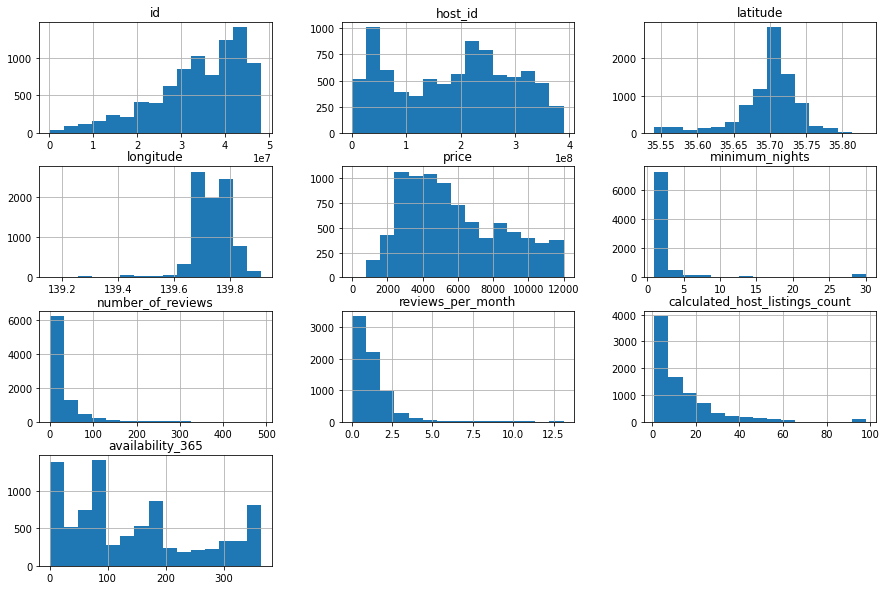

In [ ]:
# remover os *outliers* em um novo DataFrame
df_clean = df.copy()
df_clean.drop(df_clean[df_clean.price > 12000].index, axis=0, inplace=True)
df_clean.drop(df_clean[df_clean.minimum_nights > 30].index, axis=0, inplace=True)
 
# remover `neighbourhood_group`, pois está vazio
df_clean.drop('neighbourhood_group', axis=1, inplace=True)
 
# plotar o histograma para as variáveis numéricas
df_clean.hist(bins=15, figsize=(15,10));

### Boxplots sem valores discrepantes

Ainda temos a oportunidade de plotar novos gráficos de caixa sem a presença de *outliers* na variável `price`, o que torna a visualização bem mais clara. Ainda há *outliers* na variável `minimum_nights`, mas de forma reduzida, o que também melhora a visualização.

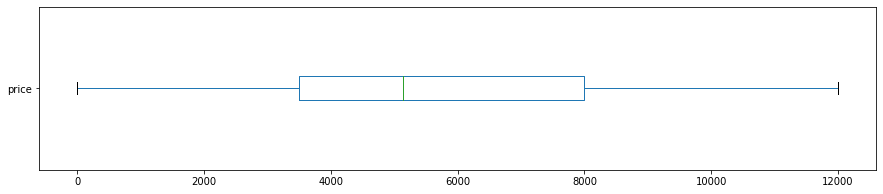

In [ ]:
# Novo boxplot para a variável "price"
df_clean.price.plot(kind='box', vert=False, figsize=(15, 3),)
plt.show()

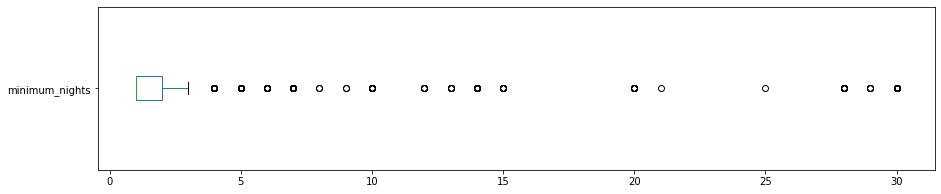

In [ ]:
# Novo boxplot para a variável "minimum_nights"
df_clean.minimum_nights.plot(kind='box', vert=False, figsize=(15, 3),)
plt.show()

### **Q4. Qual a correlação existente entre as variáveis?**

Correlação significa que existe uma relação entre duas coisas. No nosso contexto, estamos buscando relação ou semelhança entre duas variáveis.

Essa relação pode ser medida, e é função do coeficiente de correlação estabelecer qual a intensidade dela. Neste caso, estamos usando o coeficiente padrão do Pandas, o **coeficiente de Pearson**, que usa uma escala entre -1 e +1 para as relações entre as variáveis. Para observar isso visualmente, vamos aqui:

* Criar uma matriz de correlação
* Gerar um *heatmap* a partir dessa matriz, usando a biblioteca `seaborn`

In [ ]:
# criar uma matriz de correlação
corr = df_clean[['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month',
    'calculated_host_listings_count', 'availability_365']].corr()

display(corr)

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
price,1.000000,-0.049956,0.010583,0.038891,-0.197641,-0.105380
minimum_nights,-0.049956,1.000000,-0.049799,-0.117504,-0.034613,-0.013056
number_of_reviews,0.010583,-0.049799,1.000000,0.726696,-0.161446,0.027021
reviews_per_month,0.038891,-0.117504,0.726696,1.000000,-0.152095,0.005241
calculated_host_listings_count,-0.197641,-0.034613,-0.161446,-0.152095,1.000000,0.120414
availability_365,-0.105380,-0.013056,0.027021,0.005241,0.120414,1.000000


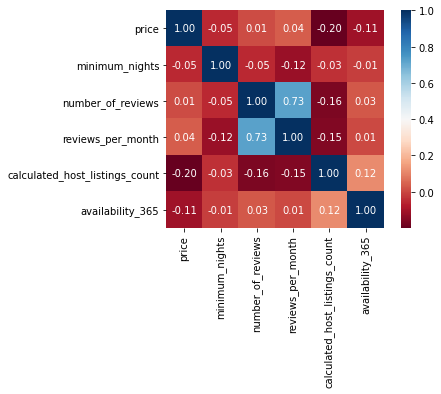

In [ ]:
# plotar um heatmap a partir das correlações
sns.heatmap(corr, cmap='RdBu', fmt='.2f', square=True, linecolor='white', annot=True);

Calculados os coeficientes de correlação, podemos dividi-os entre *positivos* e *negativos*, bem como entre *fortes*, *médios*, e *fracos*. Uma explicação da interpretação dos coeficientes de Pearson pode ser encontrada [aqui](https://pt.wikipedia.org/wiki/Coeficiente_de_correla%C3%A7%C3%A3o_de_Pearson).

A grande maioria das correlações encontradas entre as variáveis pode ser considerada fraca, tanto positivamente, quanto negativamente. A exceção a ser apontada é a correlação entre `reviews_per_month` e `number_of_reviews`. Isso indica que, basicamente, os imóveis que possuem mais revisões também possuem uma frequência alta de revisões por mês, isto é, não há um período do ano onde há um uso consideravelmente maior do imóvel pelos clientes que acessam a oferta.

### **Q5. Qual o tipo de imóvel mais alugado no Airbnb?**

A coluna da variável `room_type` indica o tipo de locação que está anunciada no Airbnb. Se você já alugou no site, sabe que existem opções de apartamentos/casas inteiras, apenas o aluguel de um quarto ou mesmo dividir o quarto com outras pessoas.

Vamos contar a quantidade de ocorrências de cada tipo de aluguel, usando o método `value_counts()`,

In [ ]:
# mostrar a quantidade de cada tipo de imóvel disponível
df_clean.room_type.value_counts()

Entire home/apt    5811
Private room       1944
Shared room         372
Hotel room          369
Name: room_type, dtype: int64

In [ ]:
# mostrar a porcentagem de cada tipo de imóvel disponível
df_clean.room_type.value_counts()/df_clean.shape[0]

Entire home/apt    0.683969
Private room       0.228814
Shared room        0.043785
Hotel room         0.043432
Name: room_type, dtype: float64

Aqui vemos a diversidade de tipos de imóveis ofertados no Airbnb: embora a maior parte (68%) seja de aluguéis de casas ou apartamentos inteiros, ainda há a possibilidade de alugar apenas cômodos privados de um imóvel, ou compartilhar imóveis/cômodos com mais usuários. Ainda há a possibilidade de alugar quartos de hotel no Airbnb: em Tóquio, no momento em que o *dataset* foi captado, esses quartos representavam 4% de todas as ofertas.

### **Q6. Qual a localidade mais cara de Tóquio?**
Uma maneira de se verificar uma variável em função da outra é usando `groupby()` do Pandas. No caso, queremos comparar os bairros (neighbourhoods) a partir do preço de locação, assim podendo indicar quais são os bairros com imóveis mais caros de Tóquio.


In [ ]:
# ver preços por bairros, na média
df_clean.groupby(['neighbourhood']).price.mean().sort_values(ascending=False)[:10]

neighbourhood
Koganei Shi      7893.750000
Komae Shi        7814.500000
Fuchu Shi        7588.600000
Meguro Ku        7545.500000
Musashino Shi    7404.500000
Chiyoda Ku       7298.838983
Minato Ku        7016.863946
Tachikawa Shi    6957.000000
Shibuya Ku       6680.087336
Ome Shi          6675.000000
Name: price, dtype: float64

Acima estão os 10 bairros com as maiores médias de preço de locação. Podemos tentar entender a disposição dos preços médios com a característica dos bairros amostrados. Lugares como [Koganei Shi](https://en.wikipedia.org/wiki/Koganei,_Tokyo) e [Fuchu Shi](https://en.wikipedia.org/wiki/Fuch%C5%AB,_Tokyo) estão próximos do que se chama a área central de Tóquio, onde está boa parte das atividades financeiras, comerciais e turísticas. [Komae Shi](https://en.wikipedia.org/wiki/Komae,_Tokyo) e [Musashino Shi](https://en.wikipedia.org/wiki/Musashino,_Tokyo) estão na porção ociental de Tóquio, mas são áreas majoritariamente residenciais, servindo de "cidades-dormitório" para aqueles que trabalham na área central da cidade.

No entanto, é preciso ter muito cuidado com esse tipo de análise, por diversos aspectos. Um deles é a representatividade de cada bairro amostrado. Abaixo está a quantidade de entradas de imóveis registradas para cada bairro de Tóquio representado no *dataset*. Percebemos já de início que lugares como [Taito Ku](https://en.wikipedia.org/wiki/Tait%C5%8D) e [Shinjuku Ku](https://en.wikipedia.org/wiki/Shinjuku) possuem mais de 1000 registros, enquanto que lugares como [Hinohara Mura](https://en.wikipedia.org/wiki/Hinohara) e [Inagi Shi](https://en.wikipedia.org/wiki/Inagi) possuem apenas 1 registro cada. 

In [ ]:
df_clean.groupby(['neighbourhood']).price.count()

neighbourhood
Adachi Ku                91
Akiruno Shi              11
Akishima Shi              2
Arakawa Ku              192
Bunkyo Ku               123
Chiyoda Ku              118
Chofu Shi                 7
Chuo Ku                 360
Edogawa Ku              137
Fuchu Shi                 5
Fussa Shi                 2
Hachioji Shi             21
Hamura Shi                4
Higashimurayama Shi      12
Hino Shi                 22
Hinohara Mura             1
Inagi Shi                 1
Itabashi Ku             152
Katsushika Ku           246
Kita Ku                 238
Kodaira Shi               9
Koganei Shi               4
Kokubunji Shi             9
Komae Shi                 2
Koto Ku                 150
Kunitachi Shi             8
Machida Shi              23
Meguro Ku                40
Minato Ku               294
Mitaka Shi                9
Musashimurayama Shi       3
Musashino Shi             6
Nakano Ku               241
Nerima Ku                63
Nishitokyo Shi           14
Okutam

Como são fornecidas as Latitudes e Longitudes para os imóveis, é possível plotar cada ponto para ver como as ofertas do Airbnb estão dispostas em um espaço. Para isso, considera-se `x=longitude` e `y=latitude`.

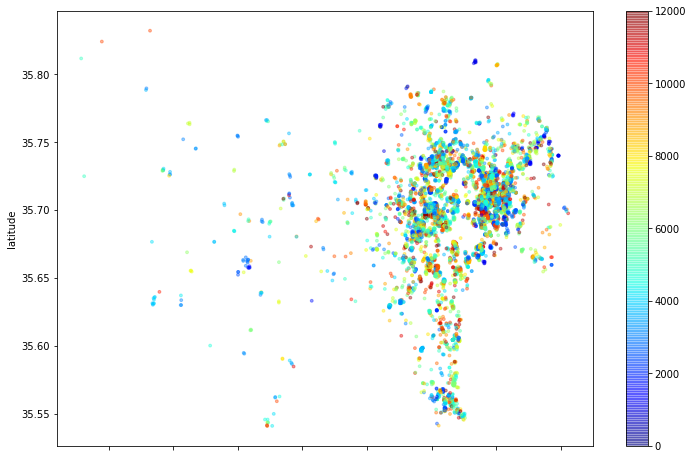

In [ ]:
# plotar os imóveis pela latitude-longitude
df_clean.plot(kind="scatter", x='longitude', y='latitude', alpha=0.4, c=df_clean['price'], s=8,
              cmap=plt.get_cmap('jet'), figsize=(12,8));

Indo um pouco além dessa plotagem, seria interessante colocar esses pontos em cima de um mapa de Tóquio, para sabermos onde as ofertas estão mais concentradas na cidade. Essa ideia será mais bem explorada na próxima subsecção.

### Q7. Onde estão concentradas as ofertas do Airbnb em Tóquio?

Assim como podemos plotar os pontos de acordo com as suas coordenadas em um gráfico, podemos também utilizar de um mapa interativo para localizar onde as ofertas encontradas no Airbnb estão mais concentradas. Para tanto, utilizamos a biblioteca `folium`, que é dedicada a trabalhar com informações geográficas.

Aqui, no entanto, não trabalharemos com o dataset inteiro, pois lidaríamos com mais de 11 mil entradas; como consequência, o processamento seria muito demorado, consumindo muito da capacidade do Google Colab (ou da própria máquina). 

Filtraremos os dados do Inside Airbnb para Tóquio se valendo de um pretexto oportuno: os Jogos Olímpicos de 2020/21, que serão realizados na cidade. Faremos uma seleção dos bairros [de acordo com os bairros da maioria dos locais onde serão realizadas as atividades esportivas](https://en.wikipedia.org/wiki/2020_Summer_Olympics#Venues_and_infrastructure). Assim, aqui serão utilizados os dados dos bairros de Shinjuku, Chiyoda, Shibuya e Sumida para fazer um novo *dataframe* a ser utilizado.


In [ ]:
tokyo = df["neighbourhood"].isin(["Shinjuku Ku", "Chiyoda Ku", "Shibuya Ku", "Sumida Ku"])
 
df_tokyo = df[tokyo]

df_tokyo

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,197677,Oshiage Holiday Apartment,964081,Yoshimi & Marek,NaN,Sumida Ku,35.71721,139.82596,Entire home/apt,11000,3,165,2020-03-04,1.44,1,328
2,899003,"Classy room @Shinjuku, Takadanoba",4799233,Yu,NaN,Shinjuku Ku,35.70865,139.69681,Entire home/apt,5200,30,93,2019-11-25,0.95,2,0
5,1096292,Home stay with a Japanese language teacher fam...,6018145,Mari,NaN,Shinjuku Ku,35.69098,139.70618,Private room,6367,1,252,2020-10-29,2.78,4,353
7,1249571,Unique stay! New&1min to the subway,6809418,Yume,NaN,Shibuya Ku,35.65111,139.72165,Entire home/apt,32571,4,102,2020-12-27,1.13,1,365
10,1306664,3rd floor penthouse @ heart of TKO,7103955,Masaharu,NaN,Shinjuku Ku,35.70099,139.74012,Entire home/apt,28943,3,162,2020-03-20,1.81,2,197
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11292,48203267,PG MIYABI Hotel - Standard Room ‼️ BIG DISCOUN...,32685237,Junichi,NaN,Sumida Ku,35.69802,139.79934,Private room,3971,1,0,NaN,NaN,1,90
11293,48215025,ノスタルジー（郷愁）,305354548,Tomoyuki,NaN,Shibuya Ku,35.65854,139.70921,Private room,10000,1,0,NaN,NaN,4,33
11303,48245895,有民宿许可、新宿駅徒歩圏、有付费停车位,49474412,Dong,NaN,Shinjuku Ku,35.69420,139.69182,Entire home/apt,5000,2,0,NaN,NaN,8,292
11305,48248916,新宿Shinjuku-ku 4bedroom豪华公寓， 新大久保駅徒歩２分,43826309,Momo,NaN,Shinjuku Ku,35.70376,139.70007,Entire home/apt,28000,1,0,NaN,NaN,22,178


Desse novo *dataframe*, extrairemos os dados de coordenadas geográficas. A ideia aqui é avaliar em que partes dos bairros de Tóquio selecionados há uma maior concentração de ofertas do Airbnb. A partir disso, podemos criar um `heatmap` onde as cores mais quentes indicam uma maior concentração de ofertas.

In [ ]:
latitude = df_tokyo.latitude.values
longitude = df_tokyo.longitude.values

In [ ]:
from folium import plugins
tokyo_heat = folium.Map(location=[35.6943005,139.7028573], 
                       zoom_start=12)
coord = []
for lat, lon, in zip(latitude, longitude):
  coord.append([lat, lon])

tokyo_heat.add_child(plugins.HeatMap(coord))


Há uma característica desse mapa interativo que é interessante de se notar quando da execução do código: à medida em que aproximamos o *zoom* do mapa, vemos que ainda persiste uma considerável concentração de ofertas em algumas quadras dos bairros. 

Como vimos anteriormente, há uma certa diversidade de tipos de aluguel que podem ser encontrados no Airbnb, desde casas inteiras, até cômodos privados ou quartos de hotel. Isso pode influenciar nessa concentração de ofertas, uma vez que em um mesmo imóvel pode ser ofertado dois ou mais cômodos/quartos, com preços e condições distintas, inclusive. Mais informações podem ser vistas [aqui](https://www.guestready.com/blog/airbnb-rentals-overview/) e [aqui também](https://trekbaron.com/accommodation-types-airbnb-vrbo/).

## Conclusões

Neste notebook feita apenas uma análise superficial na base de dados do Airbnb disponível para a cidade de Tóquio. No entanto, já se percebe que existem valores discrepantes, os *outliers*, em algumas das variáveis, como preço e tempo de estadia. 

Também se notou que em algumas localidades há poucos imóveis disponíveis, o que pode distorcer as informações estatísticas de alguns atributos. Ainda, pode se observar concentrações altas em alguns pontos da cidade, o que pode levantar algumas hipóteses em relação a como as ofertas no Airbnb são feitas.

Por fim, lembra-se que este *dataset* é uma versão resumida, ideal apenas para uma abordagem inicial. Recomenda-se que seja usado, em uma próxima análise exploratória, o conjunto de dados completos, com 106 atributos disponíveis, e que pode ser encontrado no site Inside Airbnb. Ainda assim, esses dados já são suficientes para uma introdução à parte prática de Python, utilizando aqui as principais bibliotecas para processamento dos dados, além de análises exploratórias numéricas e visuais.
